In [178]:
import numpy as np
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt

In [179]:
src = "coins.bmp"
img = Image.open(src).convert('L')
imgarray = np.array(img, dtype=int)

In [189]:
def MyHistogram(src):
    #make histogram
    histogram = np.zeros(256)

    
    for x in range (0,256):
        histogram[x] = np.sum(src == x)
    
    return histogram

def akkumuliertesHist(histo):
    # accumulated histogram
    acc = np.zeros(256)
    summe = 0
    for i in range(0,256):
        summe += i
        acc[i] = summe
    
    return acc

def kontrastAusgleich(src):
    # returns np array 
    # PIL_Image = Image.fromarray(np.uint8(imgout)).convert('L')
    # to get image with PIL  
    imgout = np.zeros_like(src)
    myacc = akkumuliertesHist(imgarray)
    histo3 = MyHistogram(imgarray)
    ng = np.zeros(256)

    for i in range(0,256):
        ng[i] = (myacc[i] - min(histo3))/(max(myacc) - min(histo3))
    
    for x in range(imgout.shape[0]):
        for y in range(imgout.shape[1]):
            imgout[x ,y] = ng[imgarray[x, y]] * 255 
  
    
    return imgout

def greyscaleimg(src):
    # returns pil image from np array
    return Image.fromarray(np.uint8(src)).convert('L')

def threshholdbinary(src):
    tresh = MyHistogram(src).mean()
    binary = np.where(src > 5, 0, 1)
    print(binary)
    return binary

def adaptivethreshhold(src):
    return binary


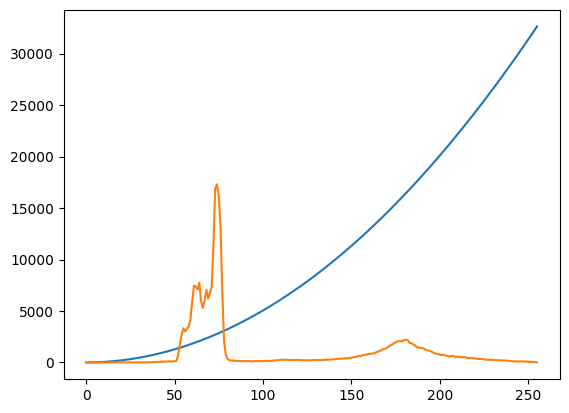

In [181]:


histo = akkumuliertesHist(imgarray)
plt.plot(histo)
histo2 = MyHistogram(imgarray)
plt.plot(histo2)
# kontrast = kontrastAusgleich(imgarray)
# plt.plot(kontrast)

In [188]:
fest = threshholdbinary(imgarray)
print(imgarray)
fest

[[49 52 53 ... 59 59 59]
 [50 51 52 ... 58 58 58]
 [47 51 53 ... 59 59 59]
 ...
 [72 72 72 ... 73 72 73]
 [73 72 71 ... 73 74 72]
 [72 71 71 ... 73 73 72]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

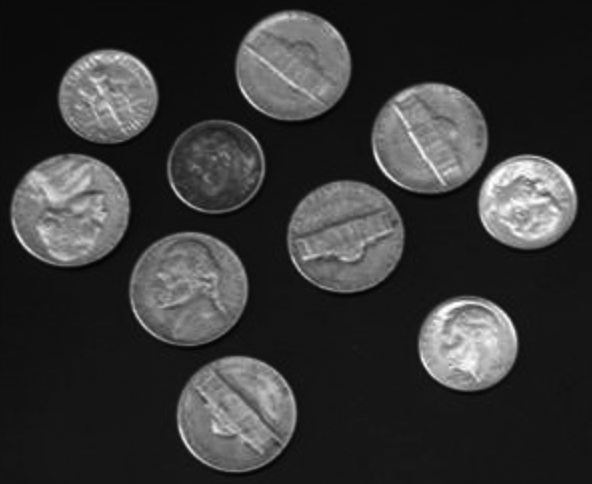

In [183]:
kontrastimg = greyscaleimg(kontrastAusgleich(imgarray))
kontrastimg

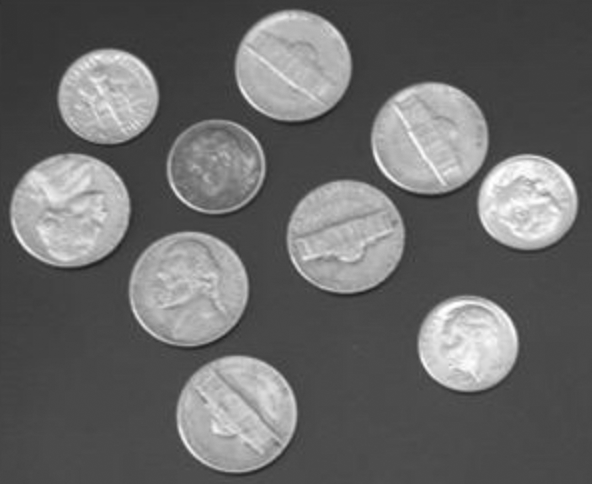

In [184]:
img